In [1]:
import tensorflow as tf
from sklearn import datasets
import numpy as np
from livelossplot import PlotLossesKeras
from matplotlib import pyplot as plt
from livelossplot import PlotLossesKeras

# Задача 1
### Скачиваем датасет mnist

In [2]:
mnist = tf.keras.datasets.mnist

# Задача 2

### Модель подобная модели с первой части семинара

In [3]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(10)
])

model.compile(
    optimizer='sgd',
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=['categorical_accuracy', tf.keras.metrics.Recall(), tf.keras.metrics.Precision()])

### Summary модели

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 102,282
Trainable params: 102,026
Non-trainable params: 256
_________________________________________________________________


# Задача 3

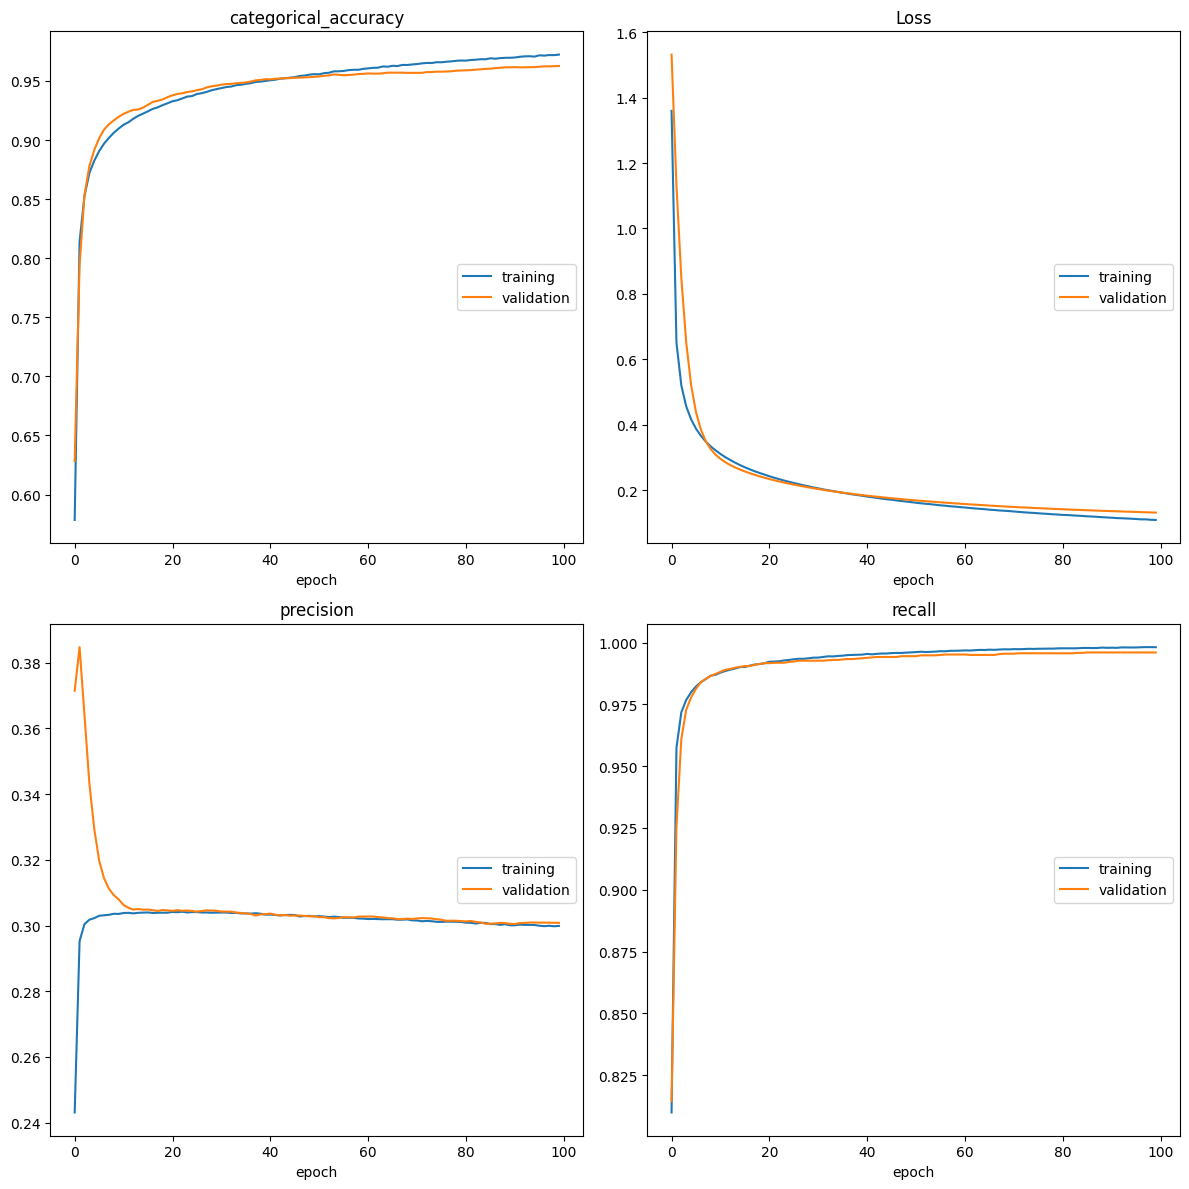

categorical_accuracy
	training         	 (min:    0.579, max:    0.972, cur:    0.972)
	validation       	 (min:    0.628, max:    0.963, cur:    0.963)
Loss
	training         	 (min:    0.109, max:    1.360, cur:    0.109)
	validation       	 (min:    0.132, max:    1.531, cur:    0.132)
precision
	training         	 (min:    0.243, max:    0.304, cur:    0.300)
	validation       	 (min:    0.300, max:    0.385, cur:    0.301)
recall
	training         	 (min:    0.810, max:    0.998, cur:    0.998)
	validation       	 (min:    0.814, max:    0.996, cur:    0.996)
313/313 - 1s - loss: 0.1347 - categorical_accuracy: 0.9594 - recall: 0.9967 - precision: 0.2987 - 553ms/epoch - 2ms/step

Test accuracy: 0.9593999981880188

Test precision: 0.29869934916496277

Test recall: 0.9966999888420105


In [5]:
(x_train_full, y_train_full), (x_test, y_test) = mnist.load_data()
x_train_full, x_test = x_train_full / 255.0, x_test / 255.0

n_values = 10
y_train_full_one_hot = tf.one_hot(y_train_full, n_values)
y_test_one_hot = tf.one_hot(y_test, n_values)

val_size = 0.1
size = x_train_full.shape[0]
batch = 1024
x_val, y_val_one_hot = x_train_full[:int(size * 0.1)], y_train_full_one_hot[:int(size * 0.1)]
x_train, y_train_one_hot = x_train_full[int(size * 0.1):], y_train_full_one_hot[int(size * 0.1):]

train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train_one_hot))
train_dataset = train_dataset.shuffle(1024)
train_dataset = train_dataset.batch(1024)

val_dataset = tf.data.Dataset.from_tensor_slices((x_val, y_val_one_hot))
val_dataset = val_dataset.shuffle(1024)
val_dataset = val_dataset.batch(1024)

callback_ = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

model.fit(train_dataset, validation_data=val_dataset, epochs=100,
          callbacks=[PlotLossesKeras(), callback_], verbose=False)

test_loss, test_acc, test_recall, test_prec = model.evaluate(x_test,  y_test_one_hot, verbose=2)

print('\nTest accuracy:', test_acc)
print('\nTest precision:', test_prec)
print('\nTest recall:', test_recall)


### Вывод:

Можно сделать вывод, что модель сходится, так как показатели loss стремятся к 0

# Задача 4

### Модель 1
В ней я увеличил количество слоёв и добавил dropout

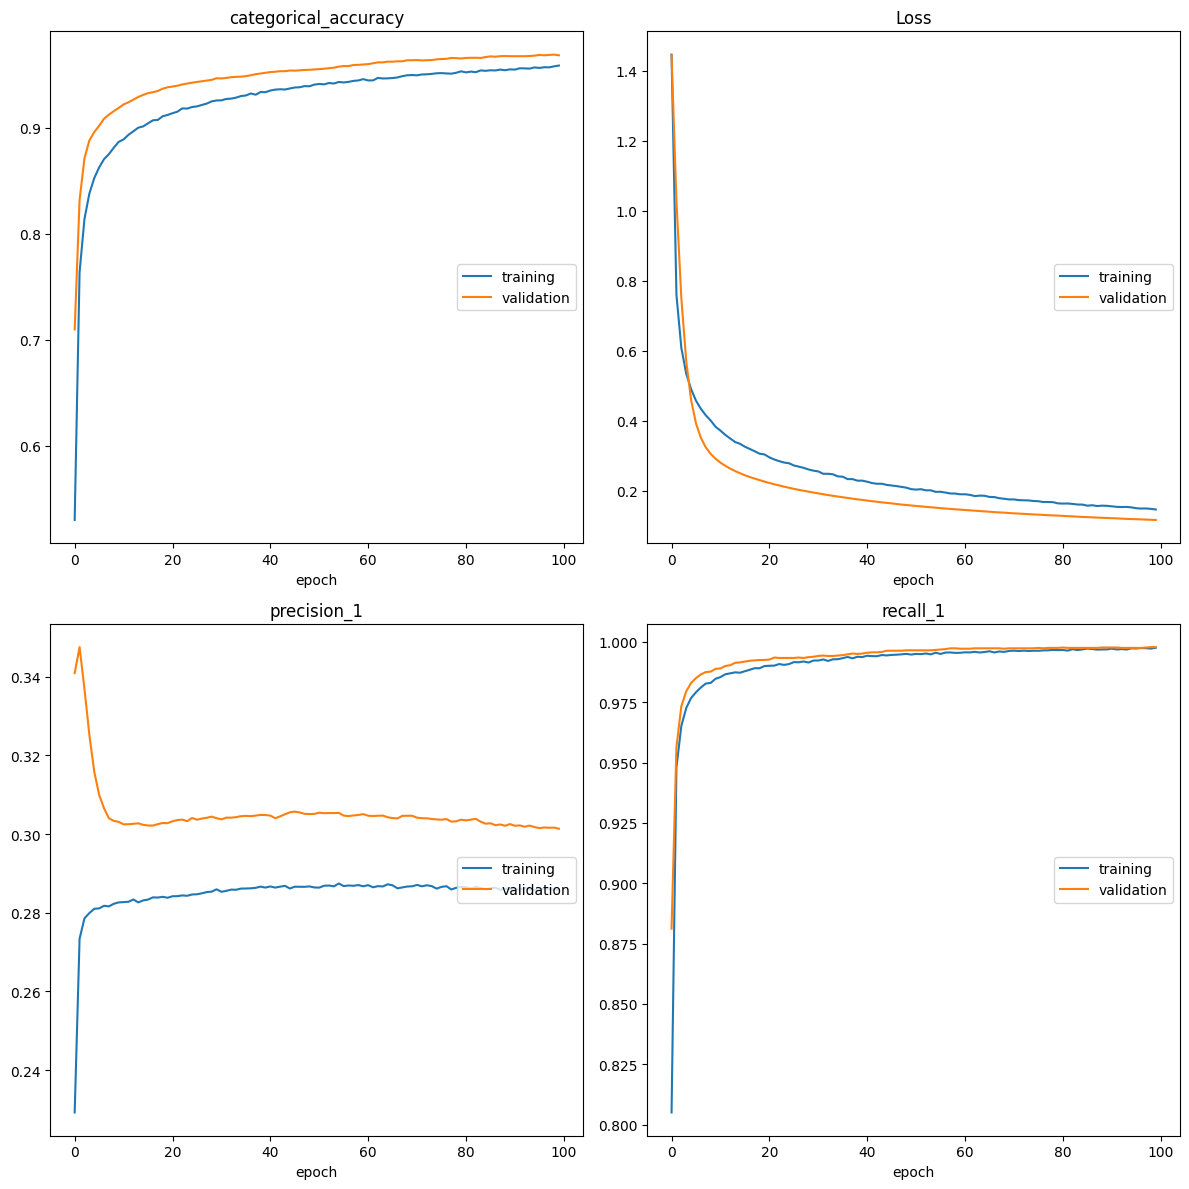

categorical_accuracy
	training         	 (min:    0.530, max:    0.959, cur:    0.959)
	validation       	 (min:    0.710, max:    0.969, cur:    0.968)
Loss
	training         	 (min:    0.146, max:    1.446, cur:    0.146)
	validation       	 (min:    0.116, max:    1.444, cur:    0.116)
precision_1
	training         	 (min:    0.229, max:    0.287, cur:    0.286)
	validation       	 (min:    0.301, max:    0.348, cur:    0.301)
recall_1
	training         	 (min:    0.805, max:    0.998, cur:    0.998)
	validation       	 (min:    0.881, max:    0.998, cur:    0.998)
313/313 - 1s - loss: 0.1155 - categorical_accuracy: 0.9668 - recall_1: 0.9981 - precision_1: 0.3023 - 627ms/epoch - 2ms/step

Test accuracy: 0.9667999744415283

Test precision: 0.30225303769111633

Test recall: 0.9980999827384949


In [6]:
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(10)
])

model_1.compile(
    optimizer='sgd',
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=['categorical_accuracy', tf.keras.metrics.Recall(), tf.keras.metrics.Precision()])


model_1.fit(train_dataset, validation_data=val_dataset, epochs=100,
          callbacks=[PlotLossesKeras(), callback_], verbose=False)

test_loss_1, test_acc_1, test_recall_1, test_prec_1 = model_1.evaluate(x_test,  y_test_one_hot, verbose=2)
print('\nTest accuracy:', test_acc_1)
print('\nTest precision:', test_prec_1)
print('\nTest recall:', test_recall_1)

### Модель 2
Была добавлена ещё одна функция активации

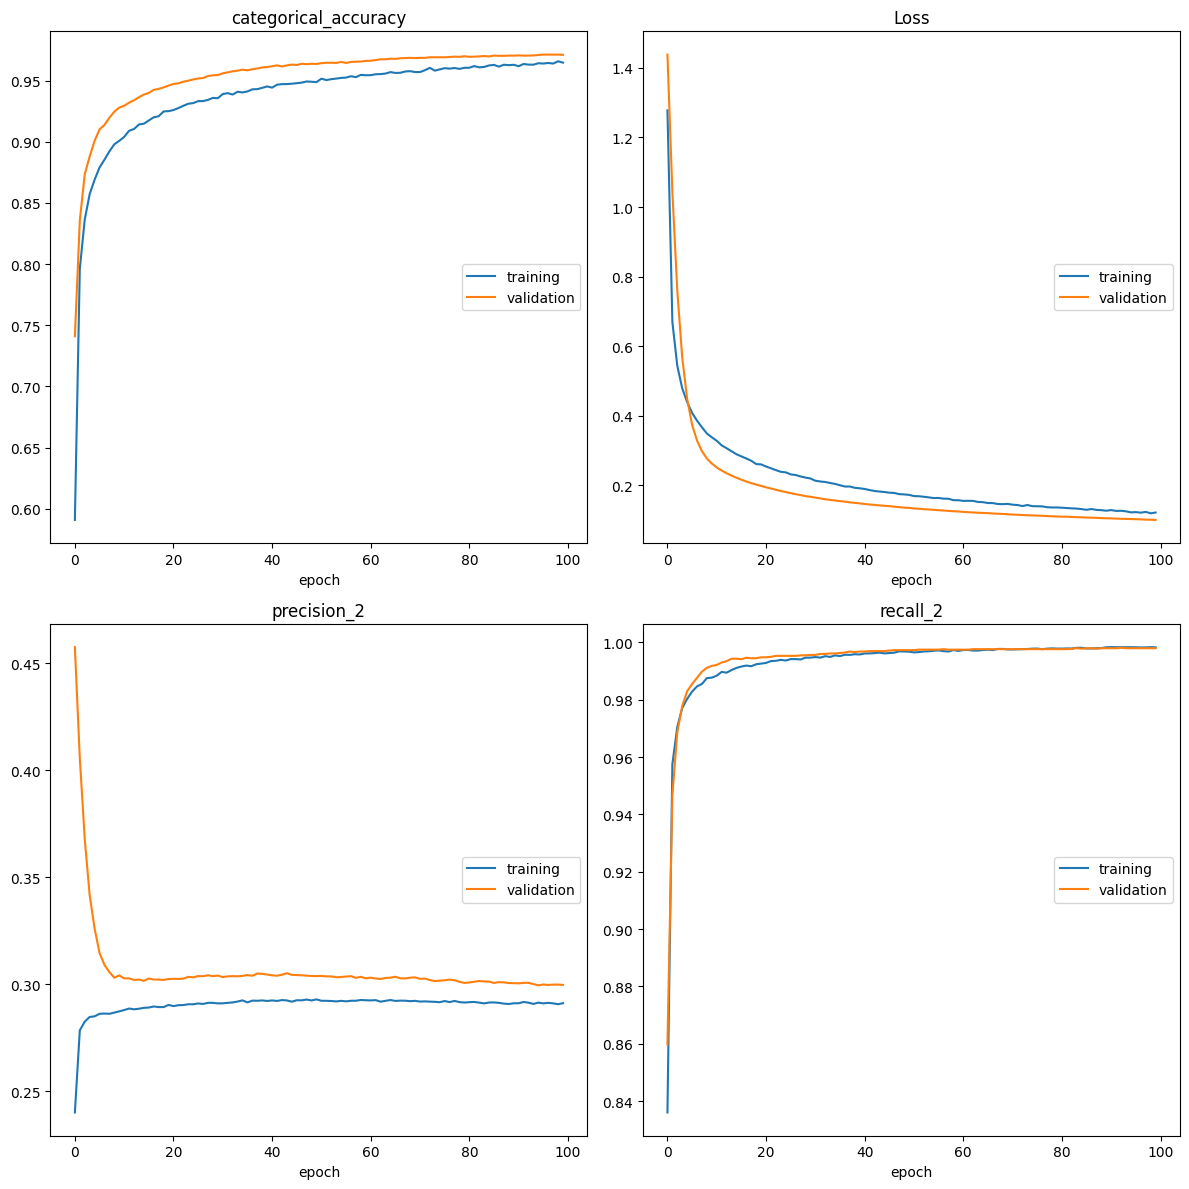

categorical_accuracy
	training         	 (min:    0.591, max:    0.966, cur:    0.965)
	validation       	 (min:    0.741, max:    0.971, cur:    0.971)
Loss
	training         	 (min:    0.119, max:    1.278, cur:    0.122)
	validation       	 (min:    0.100, max:    1.438, cur:    0.100)
precision_2
	training         	 (min:    0.240, max:    0.293, cur:    0.291)
	validation       	 (min:    0.300, max:    0.458, cur:    0.300)
recall_2
	training         	 (min:    0.836, max:    0.998, cur:    0.998)
	validation       	 (min:    0.860, max:    0.998, cur:    0.998)
313/313 - 1s - loss: 0.1010 - categorical_accuracy: 0.9696 - recall_2: 0.9987 - precision_2: 0.3002 - 598ms/epoch - 2ms/step

Test accuracy: 0.9696000218391418

Test precision: 0.30015328526496887

Test recall: 0.9987000226974487


In [7]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(256, activation='elu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(10)
])

model_2.compile(
    optimizer='sgd',
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=['categorical_accuracy', tf.keras.metrics.Recall(), tf.keras.metrics.Precision()])


model_2.fit(train_dataset, validation_data=val_dataset, epochs=100,
          callbacks=[PlotLossesKeras(), callback_], verbose=False)

test_loss_2, test_acc_2, test_recall_2, test_prec_2 = model_2.evaluate(x_test,  y_test_one_hot, verbose=2)
print('\nTest accuracy:', test_acc_2)
print('\nTest precision:', test_prec_2)
print('\nTest recall:', test_recall_2)

# Задача 5
По данной таблице можно сделать вывод, что при увеличении количества слоёв и добавления dropout accuracy растёт, также было замеченно, что добавление двух подряд идущих линейных функций активации, уменьшило accuracy

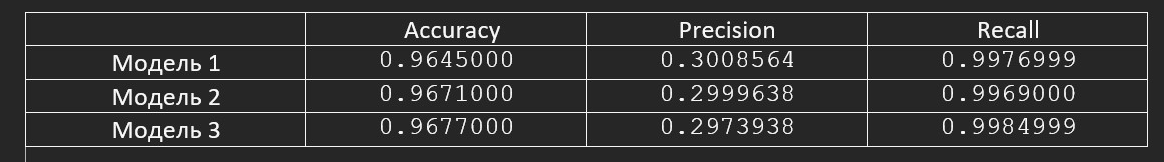